Analyse exploratoire des données de ventes

         Date Catégorie_Produit        Canal_Vente  Événement_Spécial  Mois  \
0  2018-01-01              Mode           En ligne                  0     1   
1  2018-01-01              Mode  Boutique Physique                  0     1   
2  2018-01-01              Mode     Ventes Privées                  0     1   
3  2018-01-01              Mode    Grands Magasins                  0     1   
4  2018-01-01       Accessoires           En ligne                  0     1   

   Année  Montant_Ventes  
0   2018            1207  
1   2018            1134  
2   2018            1224  
3   2018            1325  
4   2018            1123  


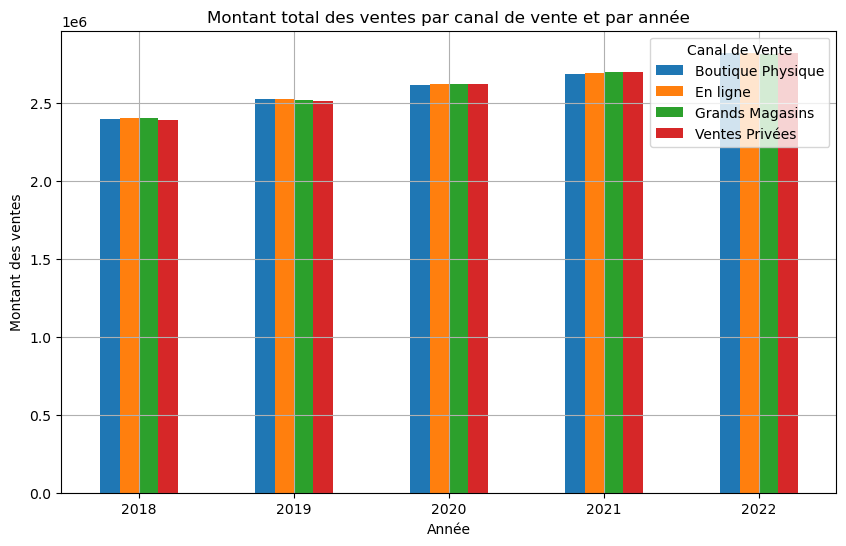

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
sell_data = pd.read_csv('data/ventes_luxe_détaillées.csv', sep=';')
sell_data.describe()
print(sell_data.head())


pivot_data = sell_data.pivot_table(values='Montant_Ventes', index='Année', columns='Canal_Vente', aggfunc='sum')

# Plot the pivot table as a grouped bar chart
pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Montant total des ventes par canal de vente et par année')
plt.xlabel('Année')
plt.ylabel('Montant des ventes')
plt.xticks(rotation=0)
plt.legend(title='Canal de Vente')
plt.grid()

# Show the plot
plt.show()

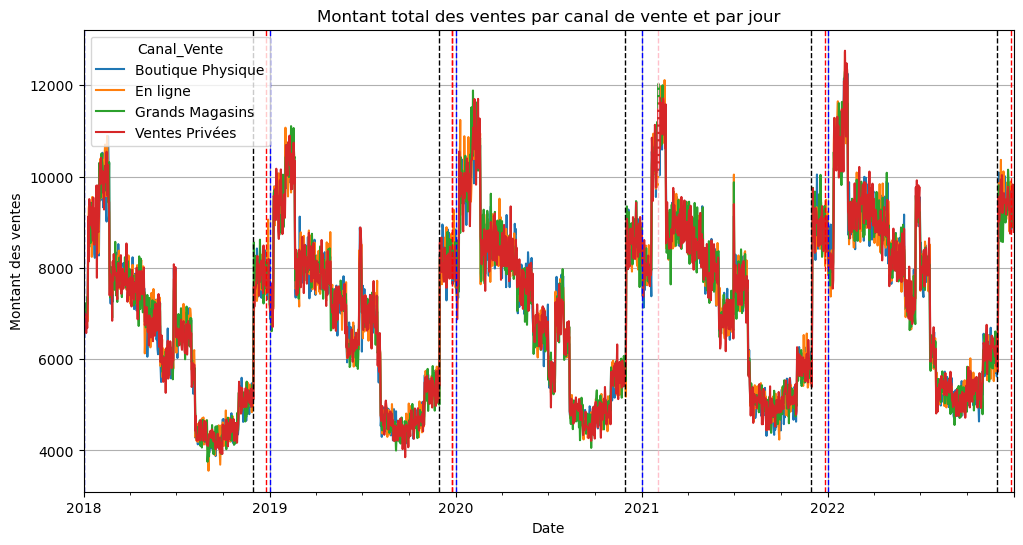

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of dates and their corresponding labels
important_dates = [('2019-12-25', 'Noël 2018', 'red'),
    ('2018-11-29', 'Black Friday 2018', 'black'),
    ('2018-01-01', 'Nouvel An 2018', 'blue'),
    ('2018-12-25', 'Noël 2019', 'red'),
    ('2019-11-29', 'Black Friday 2019', 'black'),
    ('2019-01-01', 'Nouvel An 2019', 'blue'),
    ('2019-12-25', 'Noël 2020', 'red'),
    ('2020-11-29', 'Black Friday 2020', 'black'),
    ('2020-01-01', 'Nouvel An 2020', 'blue'),
    ('2021-12-25', 'Noël 2021', 'red'),
    ('2021-11-29', 'Black Friday 2021', 'black'),
    ('2021-01-01', 'Nouvel An 2021', 'blue'),
    ('2022-12-25', 'Noël 2022', 'red'),
    ('2022-11-29', 'Black Friday 2022', 'black'),
    ('2022-01-01', 'Nouvel An 2022', 'blue'),
    ('2021-02-01', 'Fashion Week femme 2022', 'pink'),

    
]



# Convert 'Date' to datetime format and set it as the index
sell_data['Date'] = pd.to_datetime(sell_data['Date'])
sell_data = sell_data.set_index('Date')

# Group by date and channel, then plot the daily sales by channel as a line chart
daily_sales = sell_data.groupby(['Date', 'Canal_Vente'])['Montant_Ventes'].sum().unstack()
daily_sales.plot(kind='line', figsize=(12, 6))




# Loop through the list and add a vertical line for each date
for date, label, color in important_dates:
    plt.axvline(x=pd.Timestamp(date), color=color, linestyle='--', linewidth=1, label=label)
    #plt.text(pd.Timestamp(date), 100 * 0.9, label, color=color, ha="right", fontsize=10)

# Add a vertical line for Christmas 2019


# Set title and labels
plt.title('Montant total des ventes par canal de vente et par jour')
plt.xlabel('Date')
plt.ylabel('Montant des ventes')

# Show legend with added label

plt.grid()

# Show the plot
plt.show()

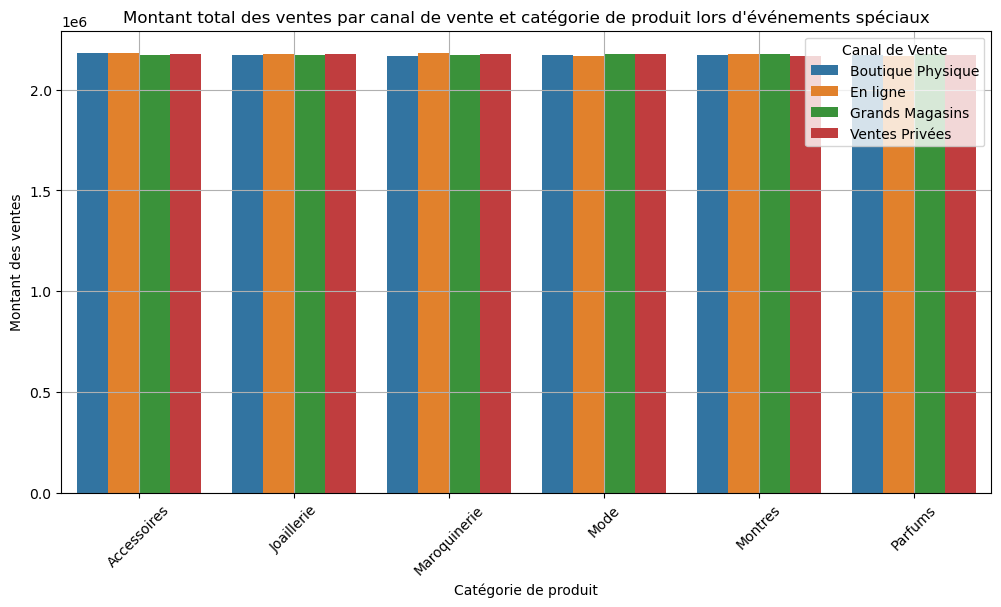

In [97]:
# Attempt a final replot with alternative data handling, ensuring compatibility
import seaborn as sns

# Prepare data for plotting with seaborn for better control
special_event_data_grouped = sell_data.groupby(['Catégorie_Produit', 'Canal_Vente'])['Montant_Ventes'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=special_event_data_grouped, x='Catégorie_Produit', y='Montant_Ventes', hue='Canal_Vente')
plt.title("Montant total des ventes par canal de vente et catégorie de produit lors d'événements spéciaux")
plt.xlabel("Catégorie de produit")
plt.ylabel("Montant des ventes")
plt.xticks(rotation=45)
plt.legend(title="Canal de Vente")
plt.grid()

plt.show()

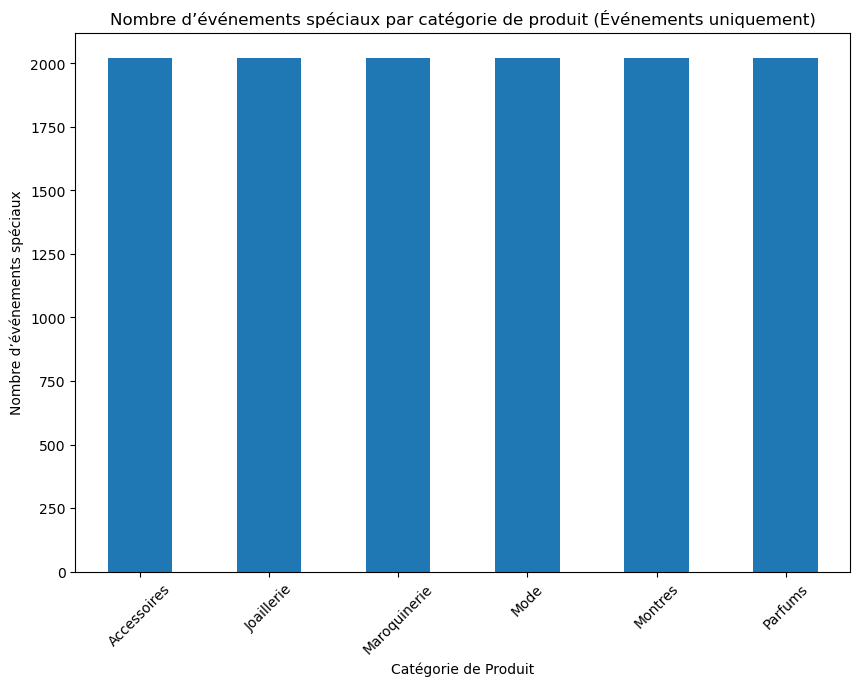

In [98]:
# Filter the data to include only rows with special events (Événement_Spécial = 1)
event_counts_by_category_special_only = sell_data[sell_data['Événement_Spécial'] == 1].groupby('Catégorie_Produit').size()

# Plot the results
plt.figure(figsize=(10, 7))
event_counts_by_category_special_only.plot(kind='bar')
plt.title('Nombre d’événements spéciaux par catégorie de produit (Événements uniquement)')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Nombre d’événements spéciaux')
plt.xticks(rotation=45)
plt.show()

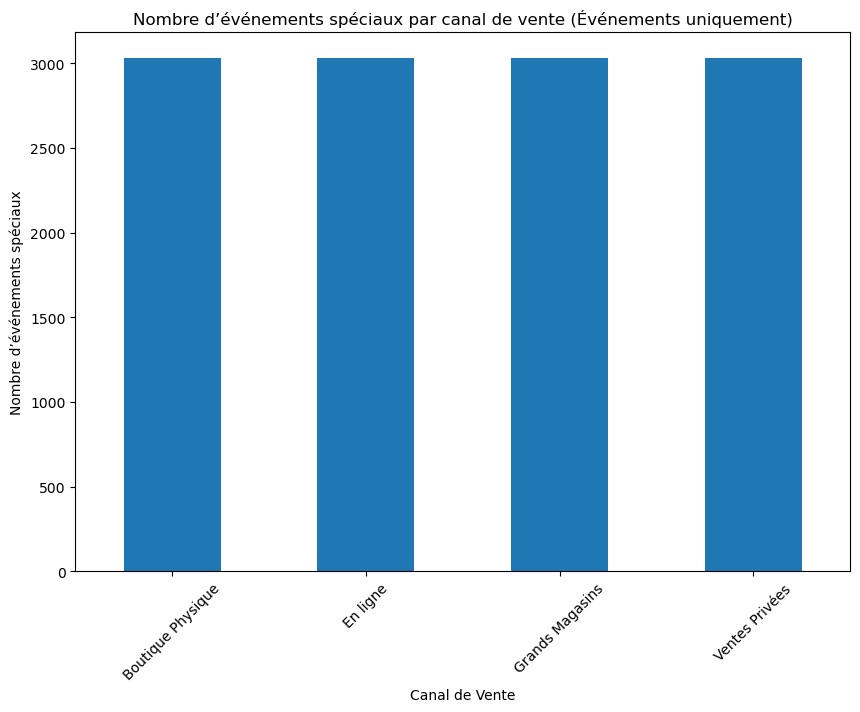

In [99]:
# Filter the data to include only rows with special events (Événement_Spécial = 1) and group by sales channel
event_counts_by_channel_special_only = sell_data[sell_data['Événement_Spécial'] == 1].groupby('Canal_Vente').size()

# Plot the results
plt.figure(figsize=(10, 7))
event_counts_by_channel_special_only.plot(kind='bar')
plt.title('Nombre d’événements spéciaux par canal de vente (Événements uniquement)')
plt.xlabel('Canal de Vente')
plt.ylabel('Nombre d’événements spéciaux')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

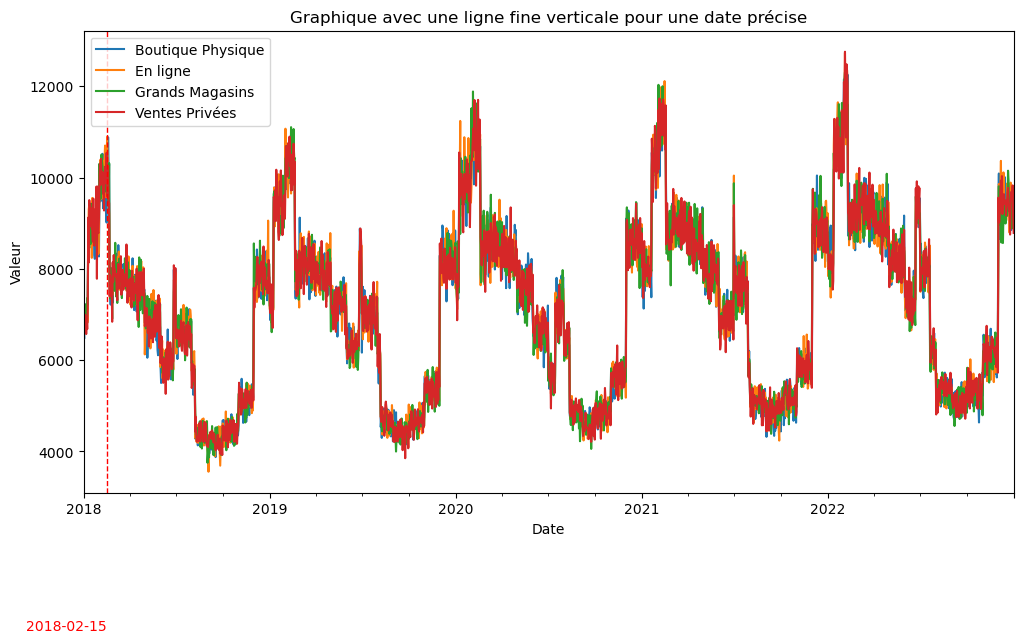

In [100]:
import matplotlib.pyplot as plt
import pandas as pd

# Exemple de données
daily_sales = sell_data.groupby(['Date', 'Canal_Vente'])['Montant_Ventes'].sum().unstack()
dates = pd.date_range(start="2024-01-01", periods=100)
values = range(100)

# Spécifiez la date que vous souhaitez mettre en évidence
highlight_date = "2018-02-15"

# Création du graphique
plt.figure(figsize=(10, 5))
daily_sales.plot(kind='line', figsize=(12, 6), legend=False)

# Ajout d'une ligne verticale fine pour la date spécifique
plt.axvline(pd.to_datetime(highlight_date), color='red', linestyle='--', linewidth=1)

# Ajout d'une légende pour la ligne verticale
plt.text(pd.to_datetime(highlight_date), max(values) * 0.9, highlight_date, color="red", ha="right", fontsize=10)

# Personnalisation des labels et du titre
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.title("Graphique avec une ligne fine verticale pour une date précise")
plt.legend()

# Afficher le graphique
plt.show()